# TM10007 Assignment template -- ECG data

## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [5]:
import zipfile
import pandas as pd
import os

with zipfile.ZipFile(os.path.join('tm10007_ml','ecg','ecg_data.zip'), 'r') as zip_ref:
    zip_ref.extractall('/content/tm10007_ml/ecg')

data = pd.read_csv('/content/tm10007_ml/ecg/ecg_data.csv', index_col=0)

print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')

The number of samples: 827
The number of columns: 9001


In [7]:
# General packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets as ds
from sklearn import metrics
from sklearn import model_selection

# Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SequentialFeatureSelector, RFECV

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
labels = data.iloc[:,-1]
x = data.iloc[:,:-1]

X_train, X_test, y_train, y_test = model_selection.train_test_split(x, labels, test_size=0.25, stratify=labels, random_state=42)
print(X_test.shape)
print(X_train.shape)

NameError: name 'data' is not defined

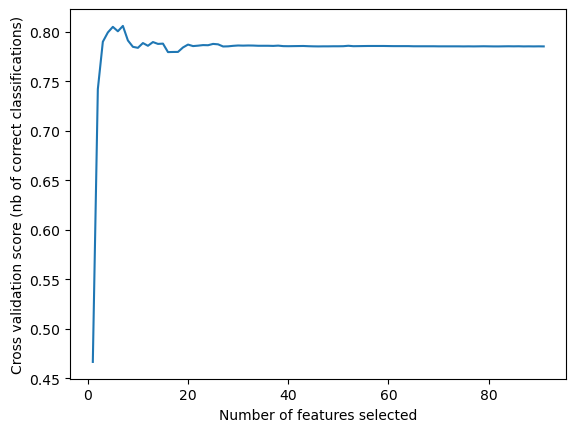

In [ ]:
# knn = KNeighborsClassifier(n_neighbors=3)
# sfs = SequentialFeatureSelector(knn, n_features_to_select=10, direction='forward')
# sfs.fit(X_train, y_train)
# X_train_features = sfs.transform(X_train)
# print(X_train_features.shape())

knn = SVC(kernel="linear")


rfecv = RFECV(knn, step=100, scoring='roc_auc', cv=model_selection.StratifiedKFold(4))
X_train_selected = rfecv.fit_transform(X_train, y_train)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1), rfecv.cv_results_["mean_test_score"])
plt.show()

In [ ]:
print(X_train_selected)
print(X_train_selected.shape)

             0_0         0_1         0_2        0_3        0_4         0_5  \
12      6.323226   15.953172   26.120406   5.109627   4.012020   16.225039   
267     3.658617    4.205258    6.057089   5.468345   9.699800    9.456077   
269  1454.262866  373.645353  229.376023  68.160132  73.549175   92.511029   
598     7.787099    8.046472    8.917372  22.052693  72.124600   20.842816   
497    10.574669    3.233686   13.710011   8.226589  15.635738   16.836976   
..           ...         ...         ...        ...        ...         ...   
500     3.452165    7.722839   22.092490   6.580385  21.635482   17.055728   
107     0.317455    8.499754   23.745729   5.899364   8.954708  108.171989   
578   938.648641   18.500222   10.161591   8.115086  48.163989    4.176806   
530   802.454177   29.672463   25.857959   6.104555   3.934592    9.699141   
730   339.242135  115.311749   55.147502  33.108579  28.579639   22.521738   

            0_6        0_7        0_8         0_9  ...    11_74

In [ ]:
clsfs = [LinearDiscriminantAnalysis(),QuadraticDiscriminantAnalysis(),GaussianNB(),
         LogisticRegression(),KNeighborsClassifier(), RandomForestClassifier()]

for clf in clsfs:
    classifier = clf.fit(X_train, y_train)
    y_pred_train = classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)
    y_score_train = classifier.predict_proba(X_train)[:,1]
    y_score_test = classifier.predict_proba(X_test)[:,1]

    auc=metrics.roc_auc_score(y_test, y_score_test)
    accuracy=metrics.accuracy_score(y_test, y_pred_test)
    F1=metrics.f1_score(y_test,y_pred_test)
    precision=metrics.precision_score(y_test,y_pred_test)
    recall=metrics.recall_score(y_test, y_pred_test)

    print(type(clf))
    print('Acc:' +str(accuracy))
    print('AUC:' +str(auc))
    print('F1:' +str(F1))
    print('precision:' +str(precision))
    print('recall:' +str(recall))



<class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>
Acc:0.8357487922705314
AUC:0.7488076311605725
F1:0.39285714285714285
precision:0.5789473684210527
recall:0.2972972972972973


c:\Users\timot\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\timot\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


<class 'sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis'>
Acc:0.4927536231884058
AUC:0.4585850556438792
F1:0.2222222222222222
precision:0.15306122448979592
recall:0.40540540540540543
<class 'sklearn.naive_bayes.GaussianNB'>
Acc:0.2318840579710145
AUC:0.479093799682035
F1:0.28699551569506726
precision:0.17204301075268819
recall:0.8648648648648649


c:\Users\timot\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<class 'sklearn.linear_model._logistic.LogisticRegression'>
Acc:0.8019323671497585
AUC:0.7901430842607312
F1:0.4675324675324675
precision:0.45
recall:0.4864864864864865
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Acc:0.8260869565217391
AUC:0.6135135135135136
F1:0.14285714285714285
precision:0.6
recall:0.08108108108108109
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Acc:0.8405797101449275
AUC:0.7329888712241655
F1:0.1951219512195122
precision:1.0
recall:0.10810810810810811
